In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dfs = [pd.read_csv(f'../data/TBProfiler/tbprofiler_metadata_{i}.csv') for i in range(1, 4)]
for i, df in enumerate(dfs):
    df["batch"] = i + 1
    print(f"{i}: {len(df)}")

df = pd.concat(dfs, ignore_index=True).reset_index().drop(columns=['index']).rename(columns={'Unnamed: 0': 'sample'})
df

0: 1120
1: 629
2: 195


,sample,main_lineage,sub_lineage,drtype,levofloxacin,moxifloxacin,rifampicin,streptomycin,amikacin,capreomycin,...,ethambutol,pyrazinamide,para-aminosalicylic_acid,cycloserine,bedaquiline,clofazimine,linezolid,delamanid,pretomanid,batch
0,10021_L003,lineage4;lineage6,lineage4.2;lineage6.3.1,Pre-XDR-TB,p.Ile486Leu,p.Ile486Leu,p.Pro439Ser,p.Lys88Arg|n.462C>T|n.799C>T,n.462C>T|n.799C>T,n.462C>T|n.799C>T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,10036_L003,lineage4,lineage4.2.1,Pre-XDR-TB,p.Asp94Gly|p.Asp94Val,p.Asp94Gly|p.Asp94Val,p.Ser450Leu,p.Lys88Arg,c.-12C>T,NaN,...,p.Gln497Arg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,10101_L003,lineage2,lineage2.2.1,Pre-XDR-TB,p.Ala90Val|p.Ser91Pro,p.Ala90Val|p.Ser91Pro,p.Asp435Val|p.Asn437Asp,n.517C>T,n.517C>T|c.-14C>T,n.517C>T,...,p.Met306Val,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,10115_L003,lineage4,lineage4.2.1.1,Other,NaN,NaN,NaN,c.489delA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,10135_L003,lineage2;lineage4;lineage6,lineage2.1;lineage4.5;lineage4.9;lineage6.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,TB_TG1467229_S210_L001,lineage2,lineage2.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1940,TB_TG1467231_S211_L001,lineage2,lineage2.2.1,MDR-TB,NaN,NaN,p.Asp435Val,n.517C>T,n.517C>T|c.-14C>T,n.517C>T,...,NaN,p.Thr135Pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1941,TB_TG1467235_S213_L001,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1942,TB_TG1467237_S214_L001,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [60]:
dfs[1].head()

,Unnamed: 0,main_lineage,sub_lineage,drtype,rifampicin,streptomycin,amikacin,capreomycin,kanamycin,ethionamide,...,levofloxacin,moxifloxacin,delamanid,pretomanid,bedaquiline,clofazimine,cycloserine,para-aminosalicylic_acid,linezolid,batch
0,TB-TG1461447_L008,lineage2,lineage2.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,TB-TG1461449_L008,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,TB-TG1461451_L008,lineage4,lineage4.2.1,MDR-TB,p.Ser450Leu,p.Lys88Arg|n.1401A>G,n.1401A>G,n.1401A>G,n.1401A>G,c.-154G>A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,TB-TG1461455_L008,lineage2,lineage2.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,TB-TG1461457_L008,lineage2,lineage2.2.1,Sensitive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


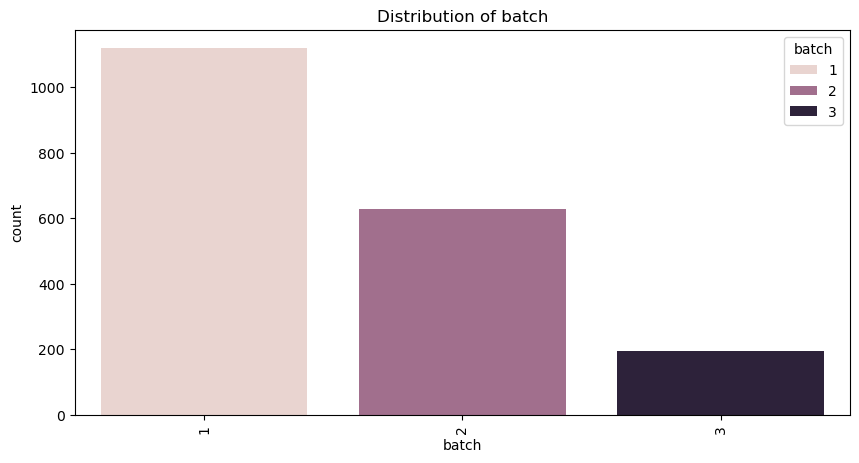

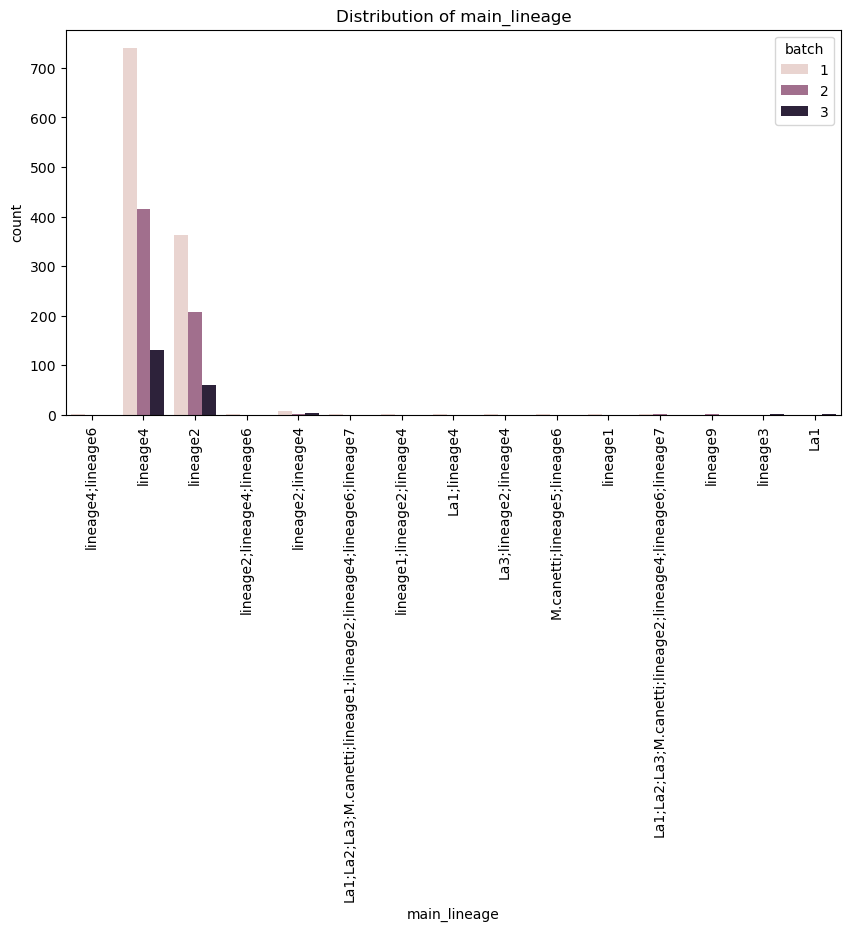

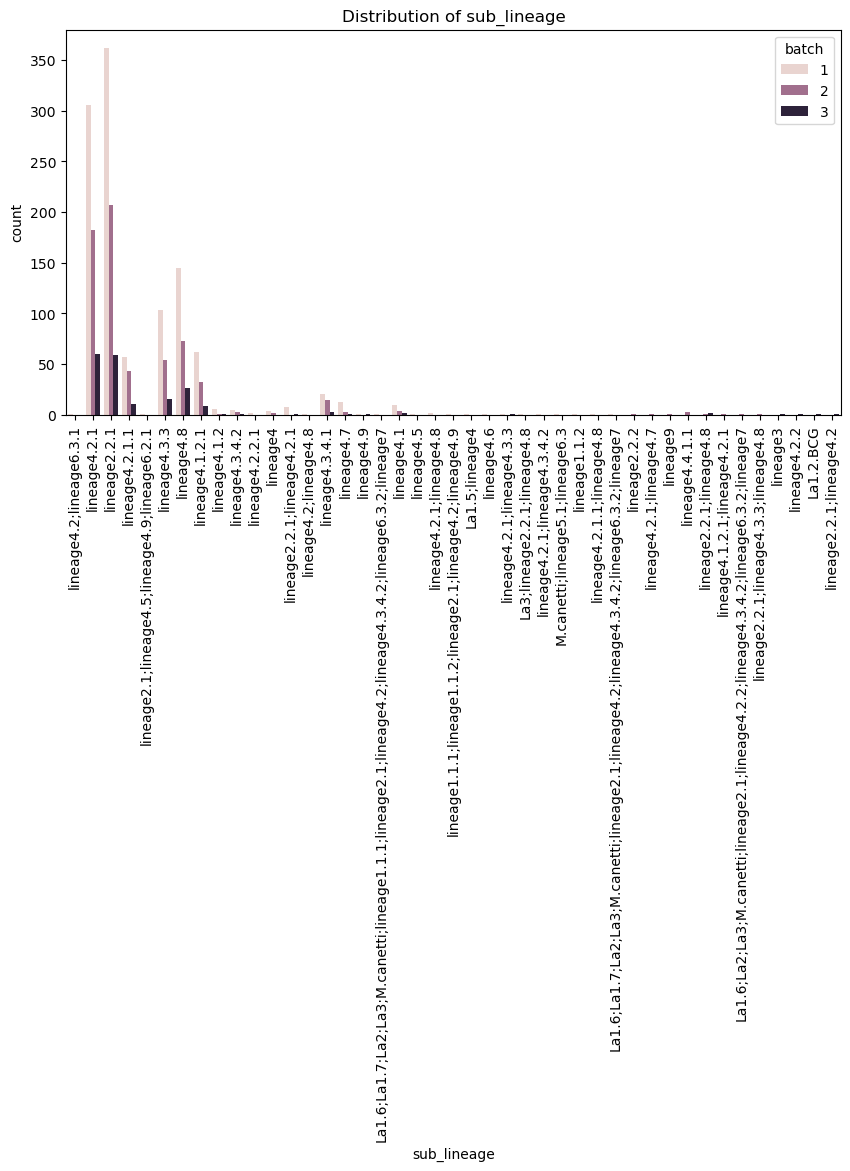

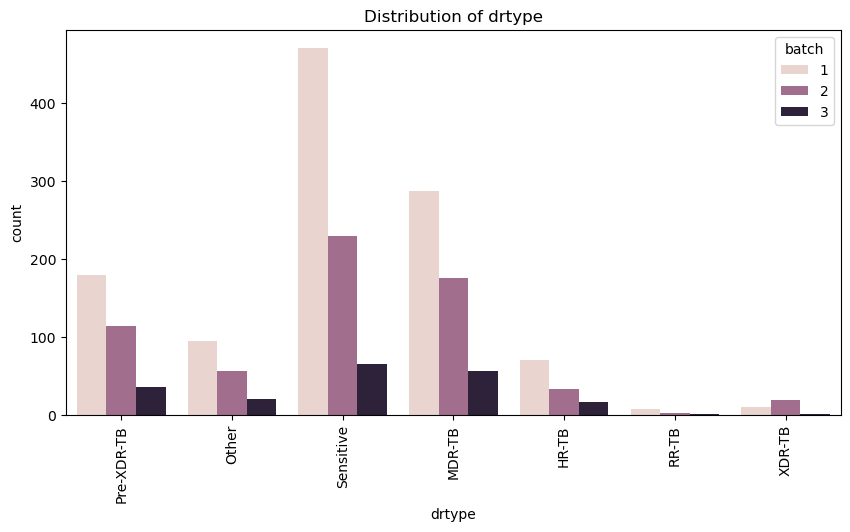

<Axes: xlabel='batch'>

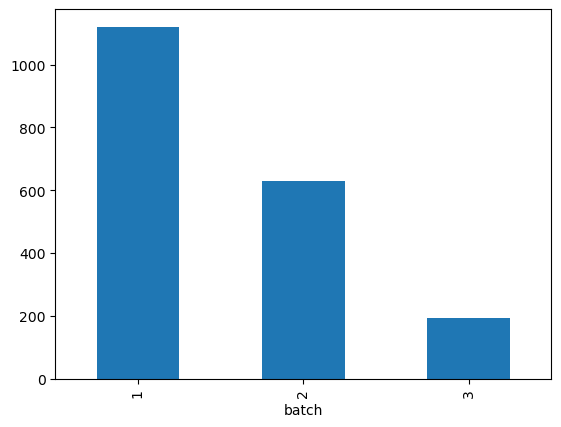

In [59]:
for x in ["batch", "main_lineage", "sub_lineage", "drtype"]:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, hue="batch", x=x)
    plt.title(f'Distribution of {x}')
    plt.xticks(rotation=90)
    plt.show()
df.value_counts("batch").plot(kind='bar')


/var/folders/2n/xwgwvbfs6fx53d63b5zgc7n0_qqjzl/T/ipykernel_18200/2702583831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, ax=ax, palette="viridis")


(0.0, 1.0)

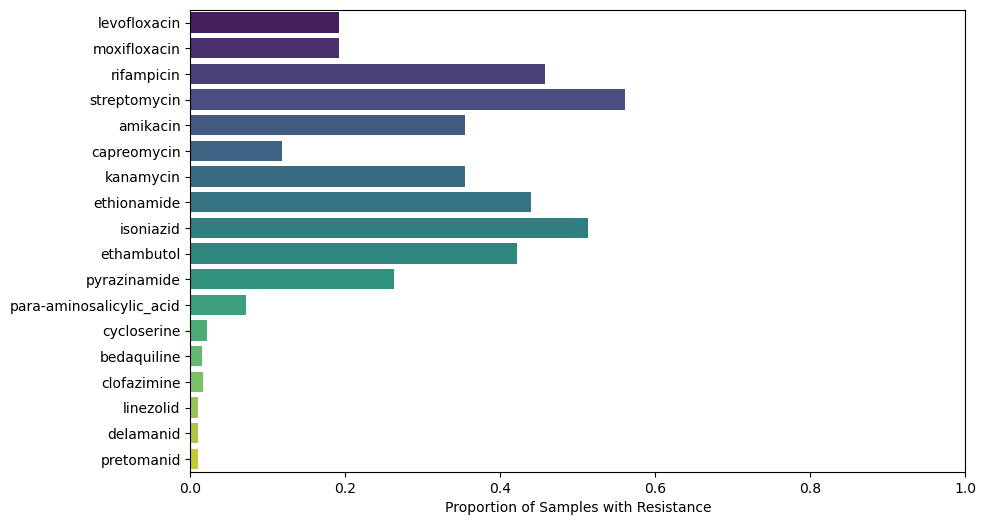

In [53]:
dr = df.count()[4:22]
x = []
y = []
for item in dr.items():
    x.append(item[0])
    y.append(item[1]/1944)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=y, y=x, ax=ax, palette="viridis")
ax.set_xlabel("Proportion of Samples with Resistance")
ax.set_xlim(0,1)